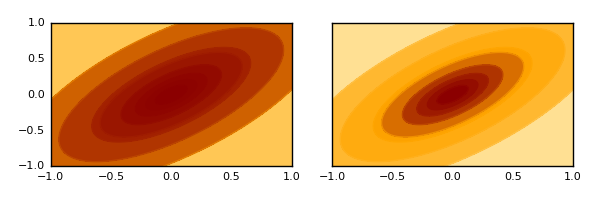

In [7]:
using Plots, Distributions
pyplot(leg=false, size=(600,200))
xx=linspace(-1,1,100)
yy=xx
ff(x,y)=pdf(MvNormal([0.,0],[3. 2;2 3]),[x,y])
gg=[ff(x,y)::Float64 for x=xx,y=yy]
qlevels=[0,.25,.5,.75,0.8,0.9,0.95,0.975,0.99,1]
levels=quantile(vec(gg),qlevels)

p1 = contour(xx,yy,gg,fill=true,levels=levels,c=:reds)
p2 = contour(xx,yy,gg,fill=true,levels=levels,c=ColorGradient(:reds,qlevels))
subplot(p1, p2, link=true)

In [ ]:
contour(xx,yy,gg,fill=true,levels=levels,c=ColorGradient(:heat,[0,0.1,0.8,1]))

In [ ]:
contour(xx,yy,gg,fill=true,levels=levels,c=ColorGradient(:heat,[0,0.8,0.95,1]))

In [ ]:
ColorGradient(:heat,[0,0.01,0.95,1])

In [ ]:
using Plots; pyplot()
surface()
x = y = 0:.1:1.
z = exp(x) * cos(y)'
surface!(x, y, z)

In [ ]:
using Plots; gadfly()
default(size=(500,300))
x = linspace(0,10,100)
y = x / 2
plot(y, x, (x,y) -> sin(y)+cos(x), levels=-1:.1:1, fill=true, fc=:heat)

In [ ]:
plot(x, y, (x,y) -> sin(x)+cos(y), nlevels=10, fill=true, c=ColorGradient(:heat,alpha=0.5))

In [ ]:
Vector[zeros(3), ones(3)]

In [ ]:
using Plots; qwt()
subplot(Vector[zeros(3), ones(3)],n=2)

In [ ]:
sp = current()
p = sp.plts[2]
Plots.convertSeriesIndex(p, 2)
sp.initargs

In [ ]:
push!(current().plts[1], rand(2));

In [ ]:
using Plots
x = ["x1", "x2"]
y = [0.2, 0.7]
bar(x, y)

In [ ]:
using Plots; using Compose
p1 = plot(rand(10))
p2 = scatter(rand(100))
compose(context(),
    (context(0.6,0,0.4,0.4), Gadfly.render(p2.o[2])),
    (context(0,0,1,1), Gadfly.render(p1.o[2])))

In [ ]:
using Plots
import Contour
default(size=(500,300))

In [ ]:
n = 100
x = sort(randn(n)); y = sort(randn(n))
cs = Contour.contours(x, y, x * y', 5)
@show typeof(cs) length(cs)
#xys = [Contour.coordinates(c.lines) for c in cs]
for clevel in cs
    @show length(clevel.lines)
    #for (x,y) in Contour.coordinates(clevel.lines[1])
    #    @show x y
    #end
end

In [ ]:
x, y = Contour.coordinates(cs[2].lines[2])
@show x y
plot(x,y)

In [ ]:
Pkg.add("GeometricalPredicates")
Pkg.clone("https://github.com/JuliaGeometry/VoronoiDelaunay.jl")
Pkg.add("Contour")

In [ ]:
using Plots; gadfly()
default(size=(500,300))
n = 100
srand(123)
x = randn(n)*3
y = randn(n)*3
z = Float64[sin(x[i]) + cos(y[i]) for i in 1:n]
scatter(x,y,z=z,c=:heat)

In [ ]:
using VoronoiDelaunay
tess = DelaunayTessellation(n)
tmin, tmax = min_coord, max_coord
twidth = tmax - tmin
function squash(a)
    amin, amax = extrema(a)
    v = similar(a)
    for i in eachindex(a)
        v[i] = tmin + twidth * (a[i] - amin) / (amax - amin)
    end
    v
end
function zippoints(x, y)
    x, y = squash(x), squash(y)
    Point2D[Point(x[i], y[i]) for i in eachindex(x)]
end
function zippoints(x, y, z)
    x, y, z = squash(x), squash(y), squash(z)
    Point3D[Point(x[i], y[i], z[i]) for i in eachindex(x)]
end

In [ ]:
a = zippoints(x, y)
push!(tess, a)

In [ ]:
for tri in tess
    println(tri)
end

In [ ]:
tess